 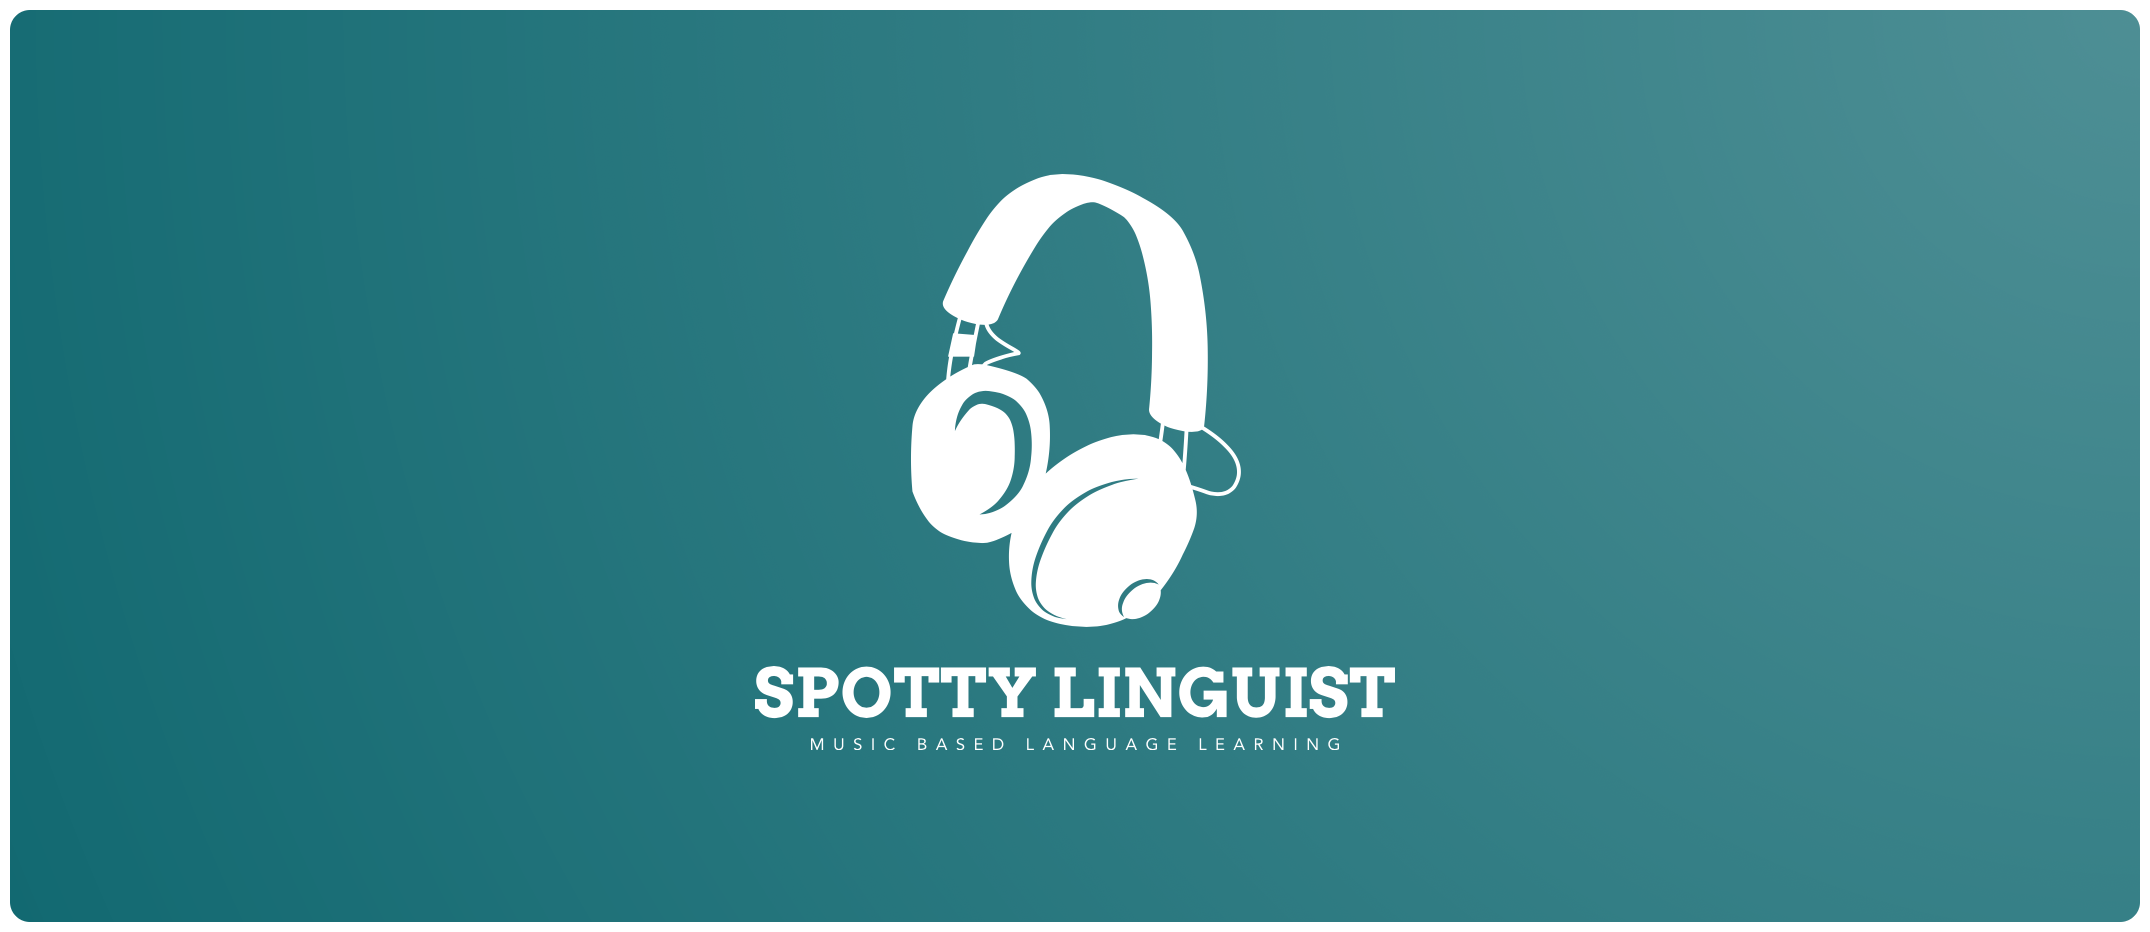

# Machine learning making foreign language music more accessible

### Overview

The goal of this project was to investigate whether machine learning techniques could be leveraged to make music more accessible for people learning a foreign language. I looked to answer the following three questions: 
- Can machine learning be utilized to identify songs which are easier to understand for language learners?
- Can it be used to classify songs based on their difficulty?
- Can it help to create custom playlists?

This project was completed as part of the General Assembly Data Science Immersive bootcamp.

### Repository Contents

* Notebook
* Images
* Read Me

Please note the data files are not included.

### Problem Statement

When learning a foreign language, finding reading and listening material that is at the right difficulty level can be challenging especially at early stages of language acquisition. Material that is truly interesting can also be extremely limited. For example, even students at an intermediate level may struggle to read foreign language news or novels etc. and therefore be limited to relying on textbooks or language learning apps. This is a problem as people will generally learn less effectively when they lack a genuine interest in the content.

Learning language through popular music faces some of the same limitations as described above as language learners may only understand a small percentage of the words in any one given song. However, my hypothesis is that given a large enough population of songs there will be some outlier songs that even a beginner student would understand a majority of the lyrics. These songs, if identified, could be valuable to language learners as they would provide reading and listening material that is both authentic and more importantly interesting.

In this project I utilised the Spotify API to collect song metadata on over 50,000 mandarin speaking artists. I scraped lyrics for each of these songs and assigned a level of difficulty to the words used in the song based on a scale of 1 to 6 (1 being the easiest and 6 being the most difficult). I then used binary classification models to predict whether the song difficulty is easy (1-5) or advanced (level 6) based on Spotify metadata and also song lyrics. Following this I used multi classification models to predict whether the song is level 1-3, 4,5 or 6. I also began to investigate whether unsupervised learning models could be applied to lyrics to group songs based on common themes, such as romance or family etc. or else to group songs that contain similar words. This could then be used to create playlists which include similar words which would expose a language learner to similar words in different contexts. Finally, I created a Jupyter Notebook based prototype music player that interfaces with Spotify and allows a user to select a language difficulty level and to then play music along with karaoke style lyrics. 


### Data Acquisition and Cleaning
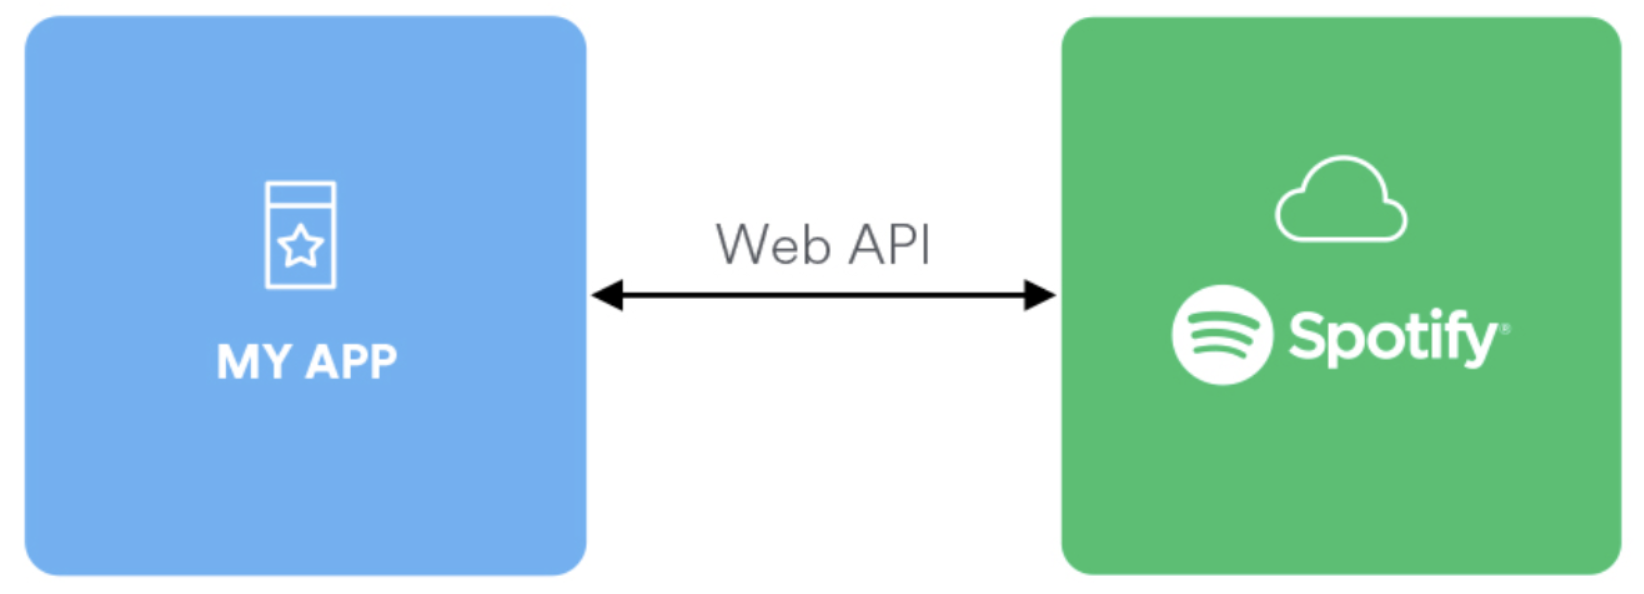

The data acquisition for this project was substantial and took up a majority of the overall time available. The initial task was to collate a database of songs from mandarin speaking artists. This was achieved by utilising the Spotify API. I started by creating a diverse playlist of 100 mandarin songs in Spotify. Then using the Python module Spotipy to interface with the Spotify API I found similar artists using the API's related artists function. I repeated this process iteratively on each of the new artists that I found until I had c.2,000 artists. I could have scraped many more artists however I was limited by the number of requests I could send to the Spotify server and time available. For each of the 2000 artists collected I found all of the albums available. Then for each album available to I found the metadata on each song. Ultimately this resulted in a dataframe of 65,000+ songs including metadata such as tempo, "danceability', popularity and genre.

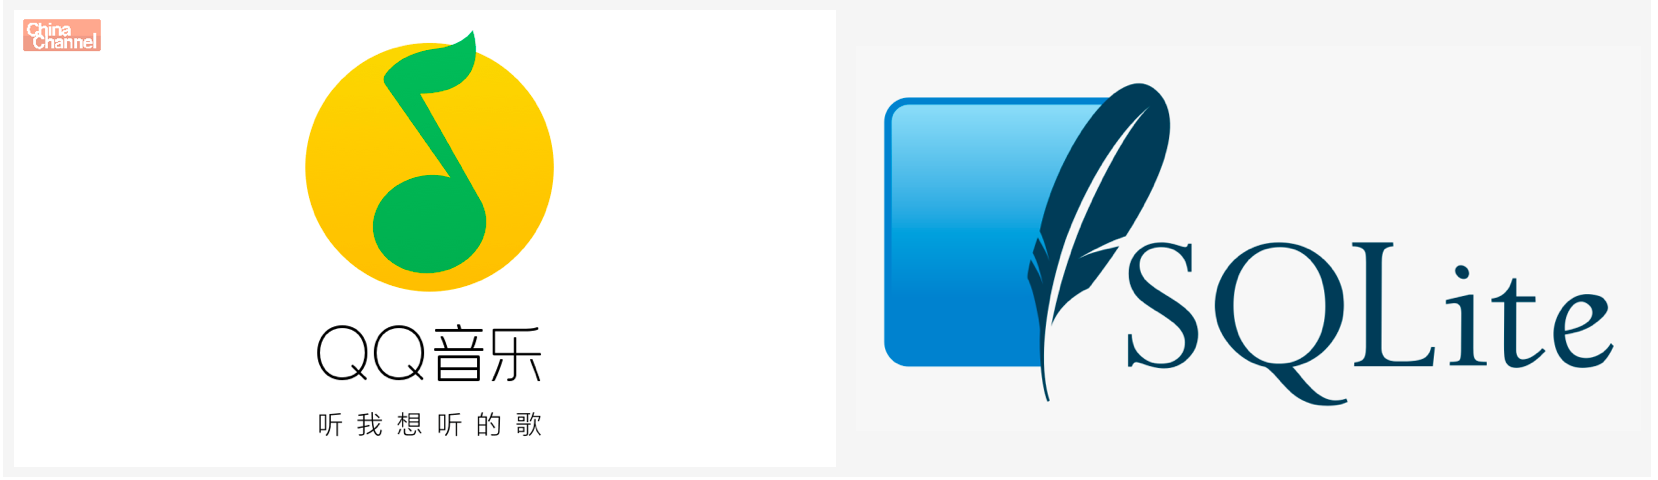

I used the QQ Music API to scrape lyrics for each of the songs. This was the most time consuming part of the overall project with the scraper running for more than 4 days due to limitations on the frequency of requests I could make to the QQMusic server. There is also not currently a Python module available for QQMusic and therefore interfacing with the API through Python is less straightforward than with Spotify. Surprisingly a majority of the songs I scraped had lyrics available. I encountered issues with the data frame size becoming too large which was solved by using an SQL database to store information. Lyrics were downloaded in string format with time stamps generally included. I used regex to filter this information. As well as saving the primary dataframe (Spotify song information + lyrics) in SQL, I also saved each song in a unique table with the lyrics in one column and the time stamps in another. I found that I could use this later to print the lyrics of a song in time with the music (just for fun!). In total I scraped lyrics for ~55,000 songs. 

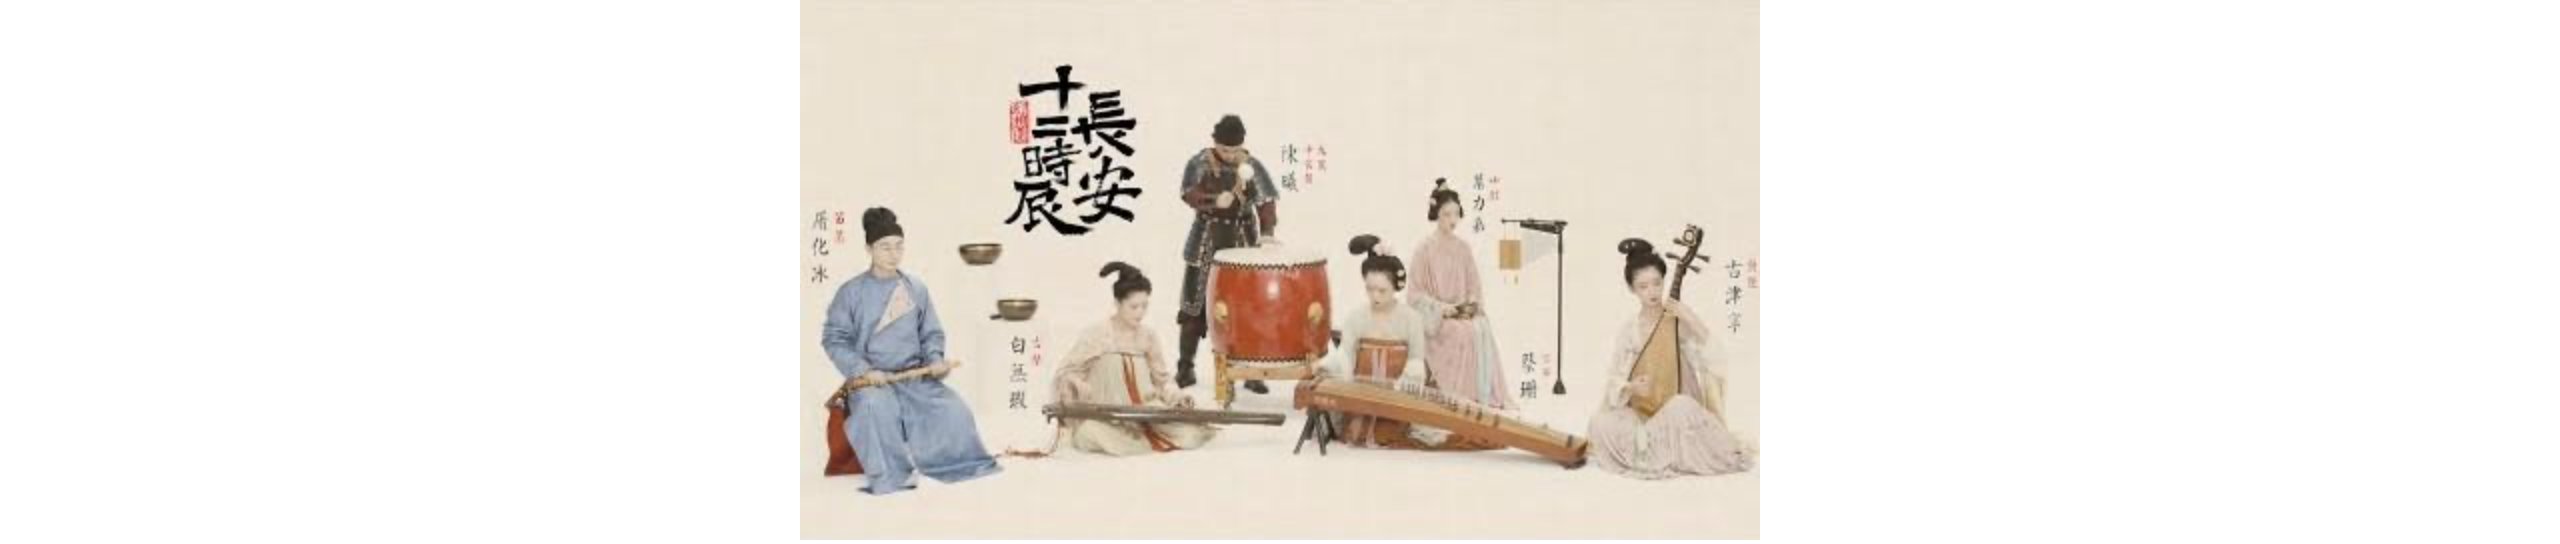

The next step was to assign each song a difficulty level based on the lyrics in the song. I used the HSK (Hanyu Shuiping Kaoshi) grading system which is the official grading system used in China to test Chinese language proficiency for non-native speakers. In this system the language learning process is divided into 6 grades (HSK 1 to HSK 6). In each stage the amount of characters /words a student is required to recognise increases:
- HSK1: 300 characters / 500 words
- HSK2: 600 characters / 1300 words
- HSK3: 900 characters / 2300 words
- HSK4: 1200 characters / 3300 words
- HSK5: 1500 characters / 4300 words
- HSK6 1800 characters / 5500 words

Using this system I gave each song a score for each HSK level to show what percentage of the lyrics would be known by a person at that level. I utilised CSV files of mandarin vocabulary lists at each HSK level.
Chinese words can be made of one or more characters; for example 'I' is formed by one character 我, where as 'library' is formed by 3 character 图书馆. I therefore used 'SnowNLP' a mandarin NLP Python package to tokenize the lyrics.

The data required a reasonable amount of cleaning throughout the above acquisition stages. Cleaning the lyrics scraped through QQMusic was the most intensive aspect given that lyrics were not always provided in a constant format and other information was included such as timestamps. Other data cleaning included removing songs with no lyrics available and deleting duplicates, non-mandarin language songs and songs with too few lyrics.



### EDA

The KDE plots below demonstrate the distribution of song comprehension for each HSK level. At the lowest HSK levels 1 and 2 comprehension is low with HSK 1 / HSK 2 vocabulary covering on average 30% / 46% of lyrics in a song respectively. There are very few songs that are accessible at an 80% comprehension level (HSK 1: total of 4 songs, HSK 2: 32 songs). Nonetheless, these outliers could be valuable to learners at this level where accessible authentic material is extremely limited.

Of course comprehension rates increase with HSK level and therefore the number of songs available at an 80% comprehension increases too. At HSK 3 the number of songs available at 80% comprehension spikes to over 1000+ and at HSK 4 to 13,000+ and finally to 34,000+ for both HSK 5 and 6. This shows that even at HSK 3 and HSK 4 levels there is a large corpus of music that should be accessible to learners.

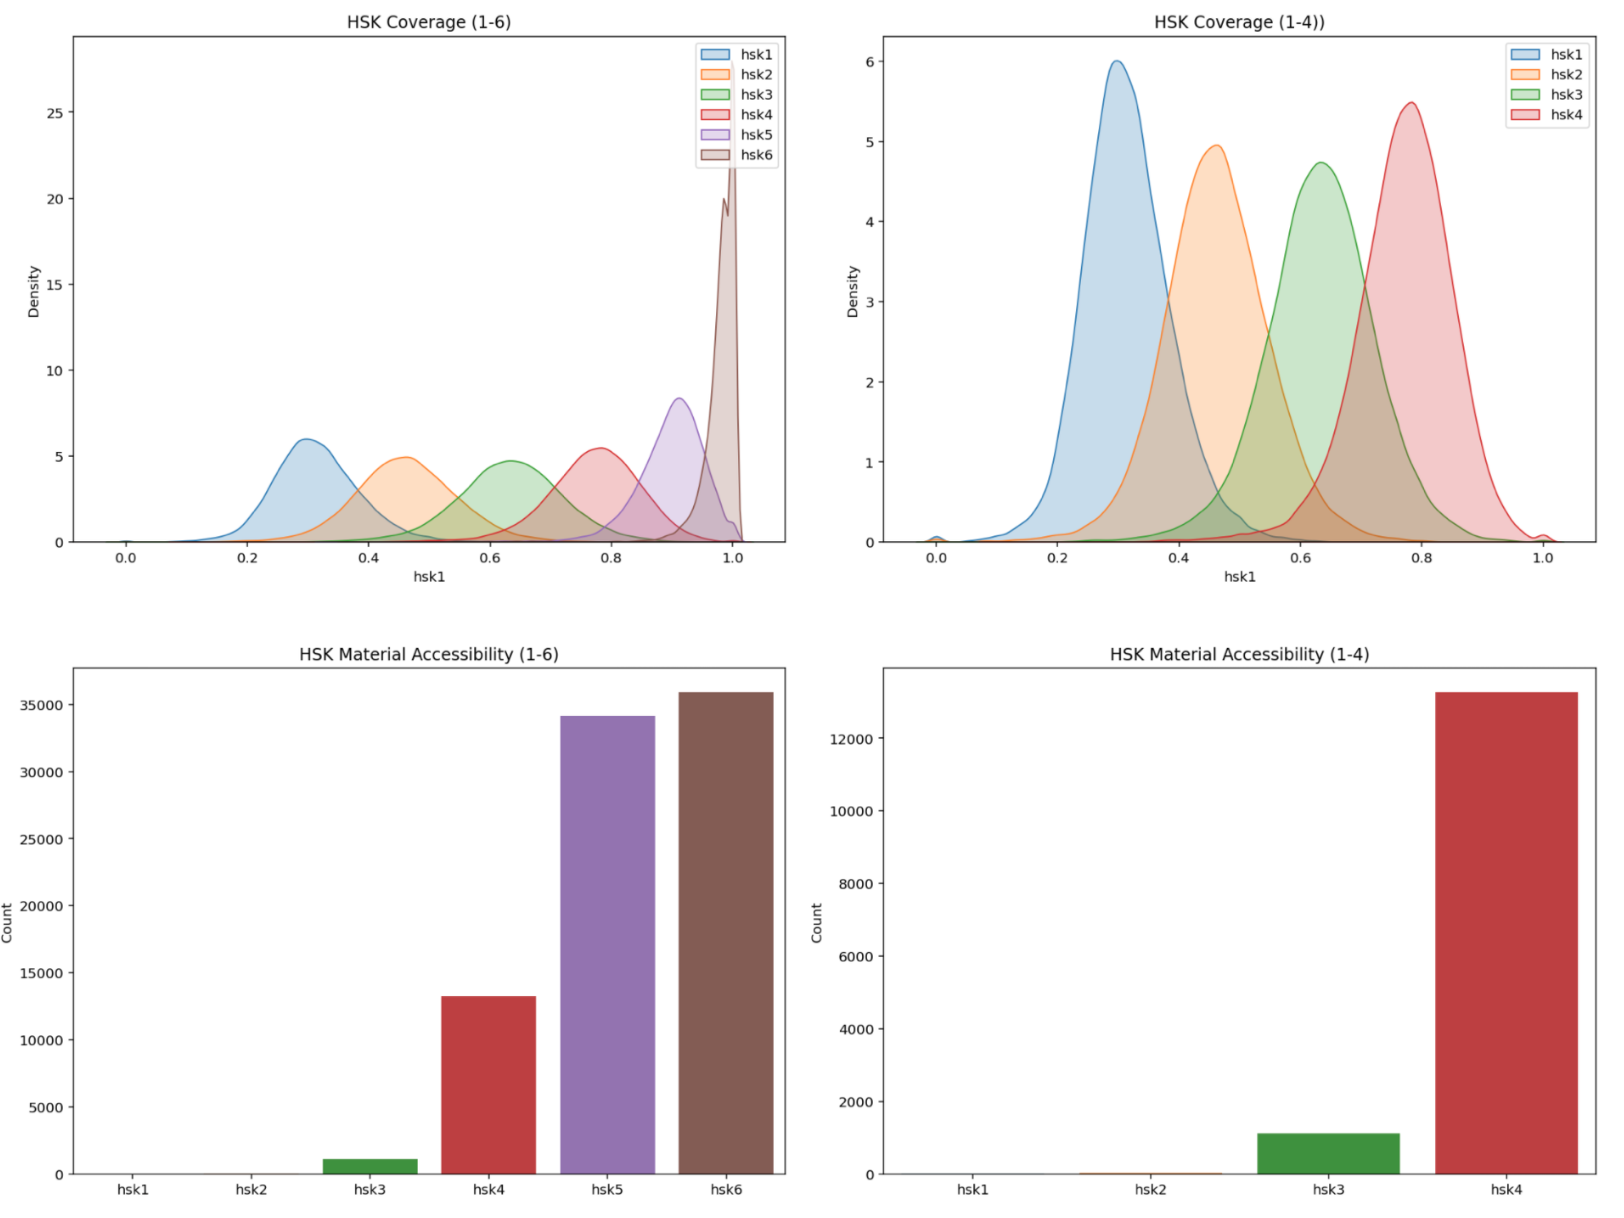

The below figure created in Tableau shows the universe of 55,000 songs collected in this project and how as language proficiency increases the amount of songs accessible also increases. The innermost circle in blue represents the few songs that are suitable for HSK 1 whereas the outside circle in yellow (HSK 6) shows that moving from HSK 5 to HSK 6 provides access to only a few more songs. 

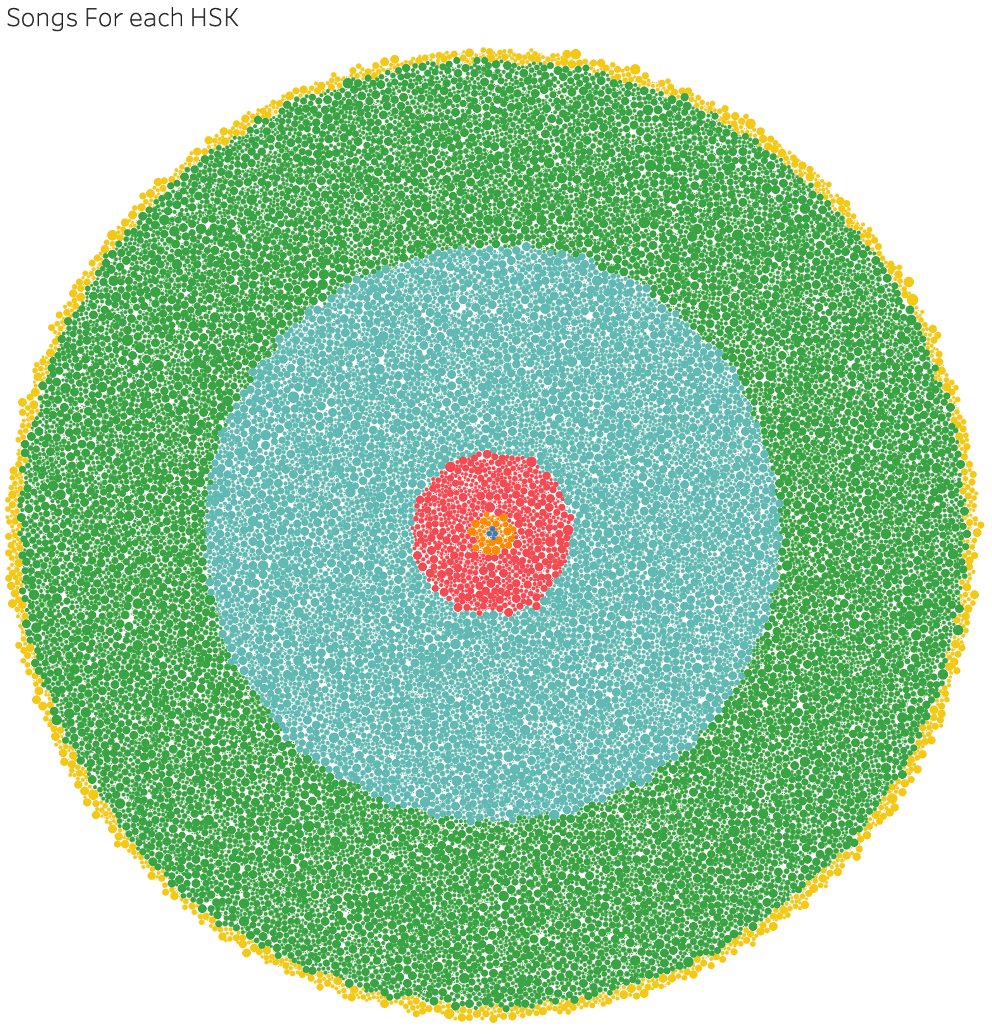

The above image can be recreated by grouping songs by genre.
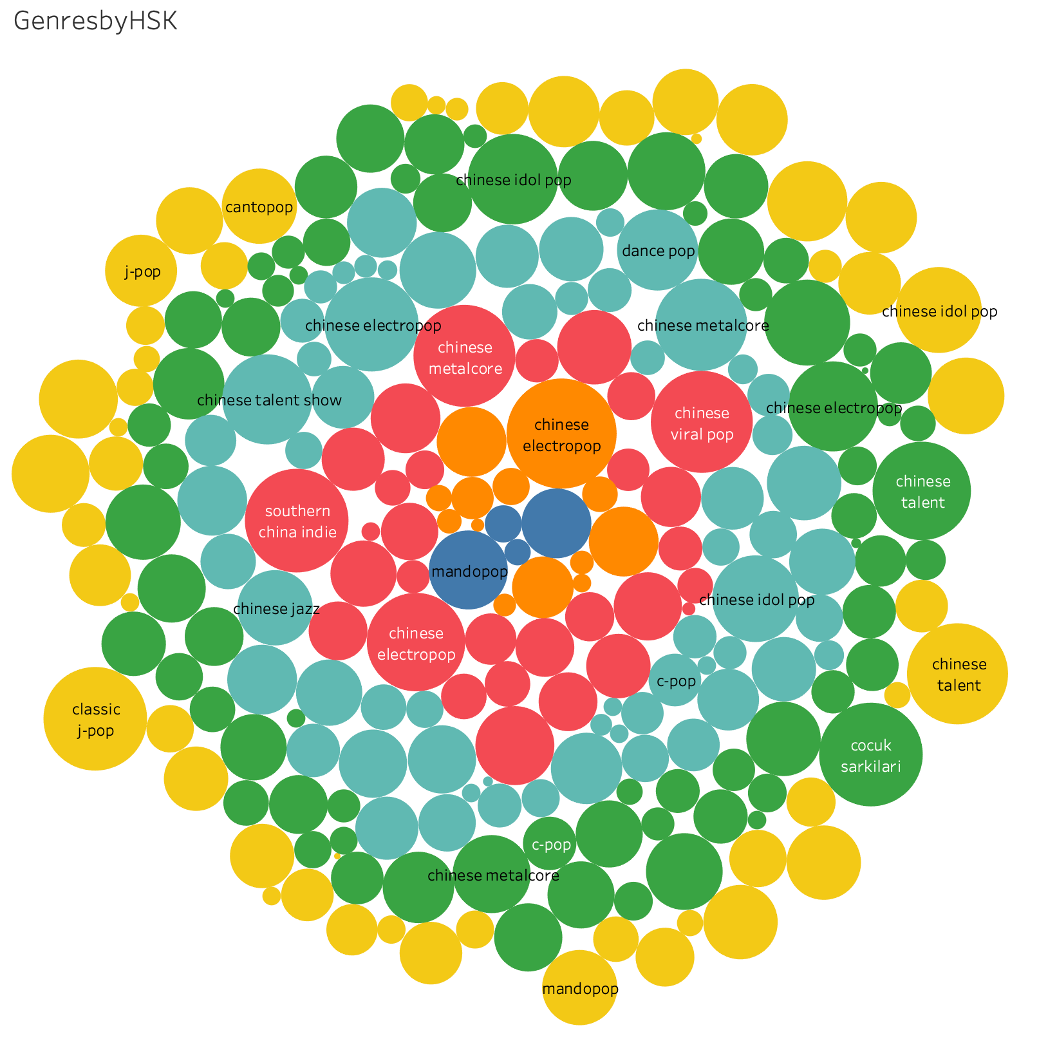

Using Tablea I created a web interface that allows a user to select a HSK level. They are then able to see all of the songs that are accessible at that level sorted by genre, then artist and finally expected comprehension level. By hovering over each song (coloured square) metadata can be viewed such as popularity. Clicking on the link takes the user to the Spotify web app and plays that song. Below is a link (Tableau login required) to the web interface as well as a screenshot. 

https://prod-uk-a.online.tableau.com/#/site/spottylinguist/views/SpottyLinguist/Home?:iid=3



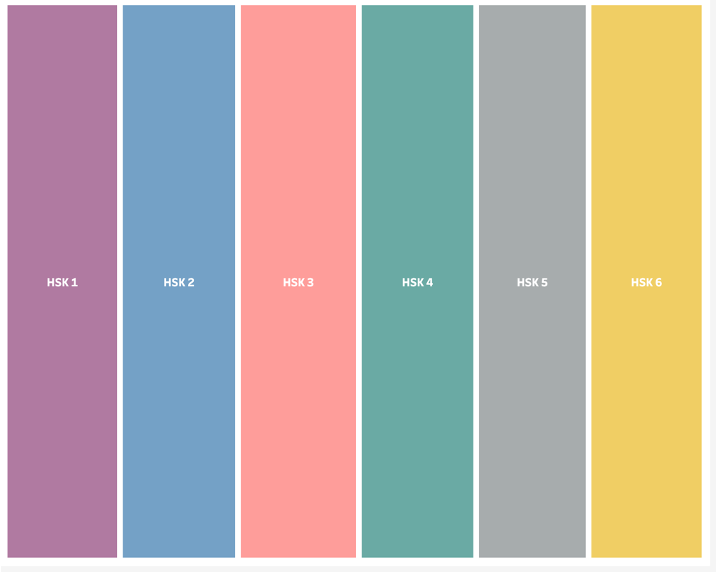
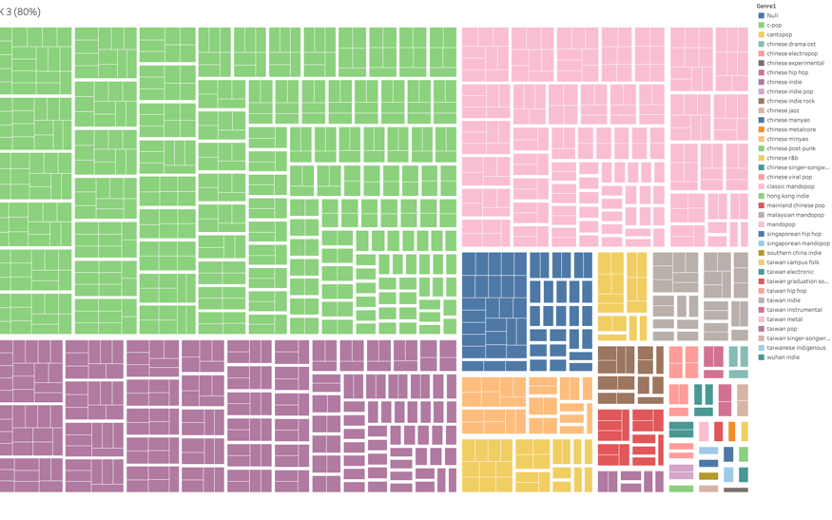

I also created plots showing the most frequent words used in songs. This was also useful when deciding which words to exclude later in the modelling stages. I was not surprised to see love (爱) as one of the most frequently used words.　

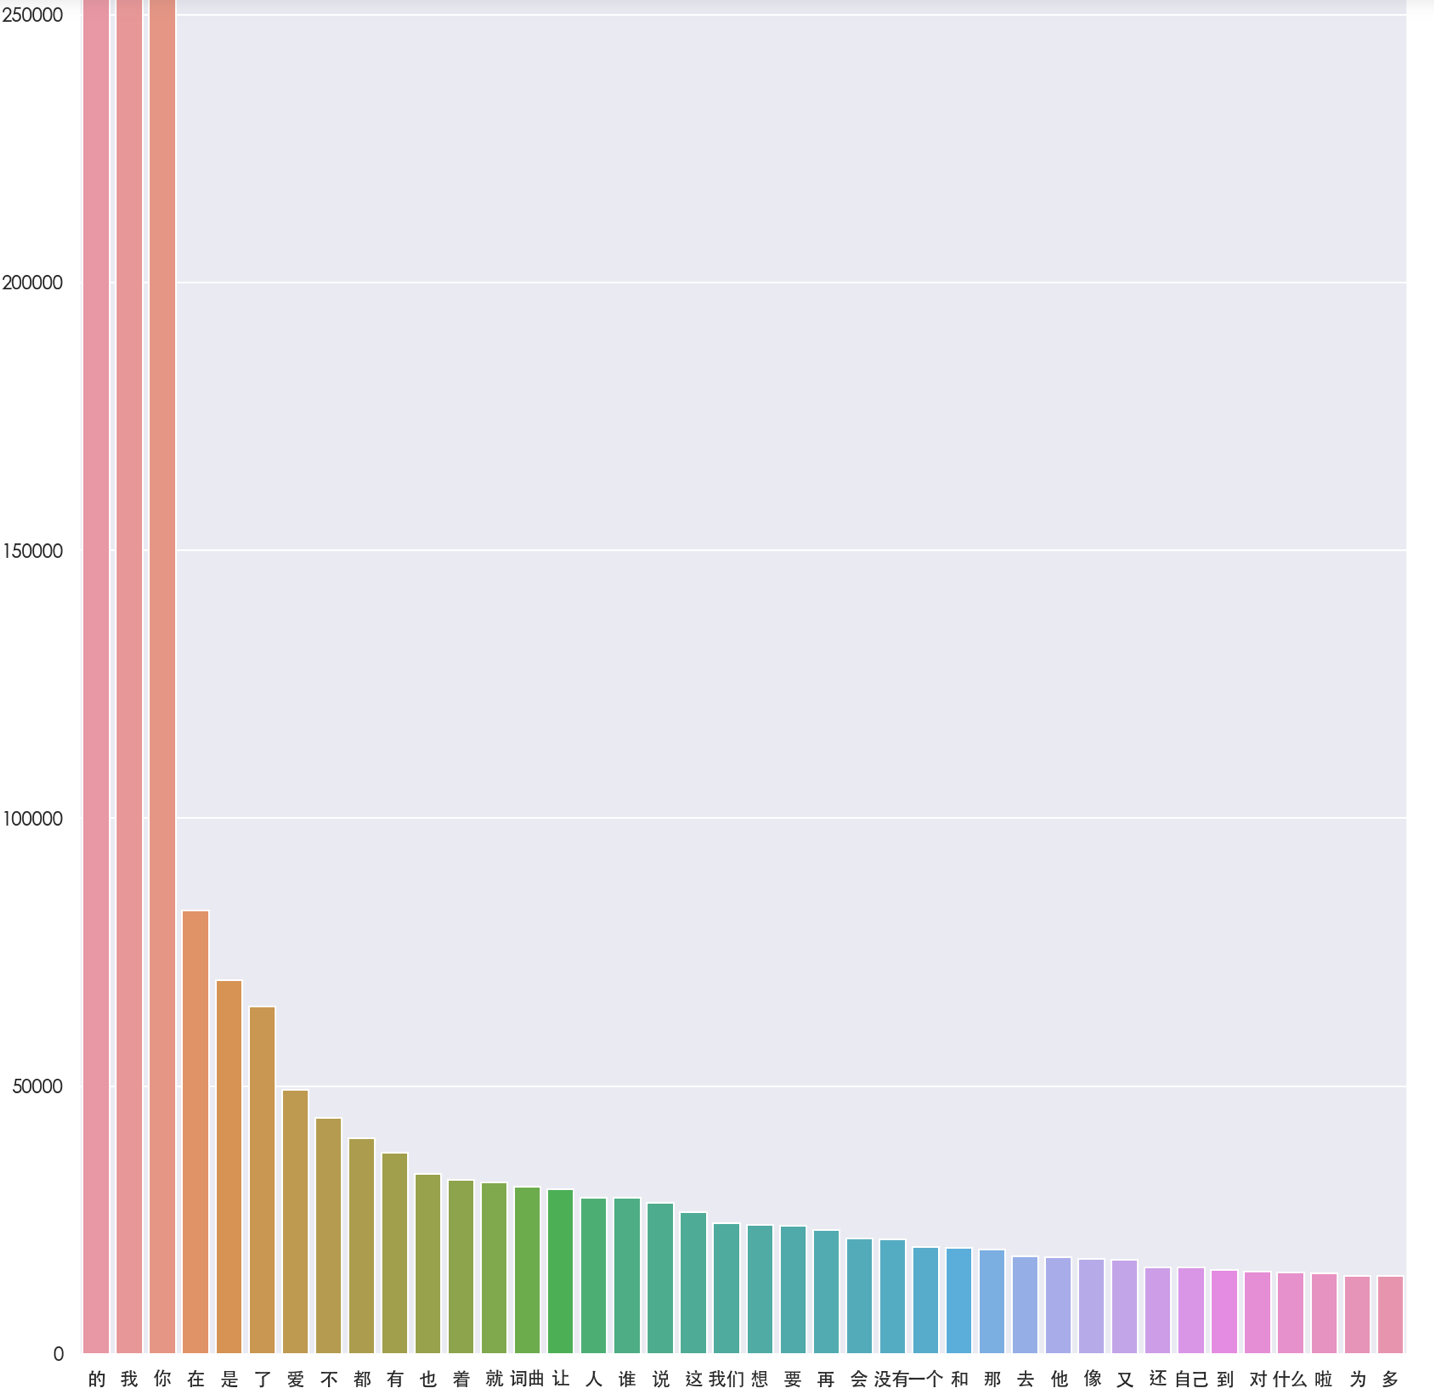


### Modelling


#### Binary Classification of Song Difficulty Based on Spotify Metadata
Finding songs that are accessible at the right level is computationally intensive and time consuming given that the method used so far requires scraping lyrics for each song in the database and then processing these. Is it possible to speed up this process by identifying songs that are more likely to be at the right level based on Spotify data? My hypothesis was that there would be very limited information contained in the song metadata. 

I used a logistic regression model to try and identify songs that are HSK 1-4 vs HSK 5-6 from Spotify song metadata alone. Data included information such as tempo, danceability, speechiness, acousticness, time signature and duration. The mean cross validation score was 54% compared with the baseline of 47%. This score suggests (unsurprisingly) that there is very limited information contained in song metadata for classifying song language difficulty. I then added artist and genre to the explanatory data and rerun the logistic model. This resulted in an improved mean cross validation score of 60%. The coefficient with the greatest weight was Chinese R&B. When looking at this genre it can be seen that 86% of songs have lyrics within HSK1-4 vs. the baseline of 52%. Singoaporean Mandopop was the second coefficient and has 68% in scope for HSK 1-4. 

Whilst the model was poor overall at identifying HSK level it was able to identify some genres which may be more accessible to language learners. 

#### Binary Classification of Song Difficulty Based on Song Lyrics

I ran binary classification models using song lyrics as the explanatory variables and the target variable being the song difficulty level - easy (HSK 1-5) or difficult (HSK 6). The baseline score was 53% with the two groups roughly of equal size. I experimented with different methods of vectorizing the lyrics using Term Frequency Inverse Document Frequency ("TfidfVectorizer") and CountVectorizer. The CountVectorizer vectorizes words based on their frequency and performed more strongly which I attribute to song difficulty level being related to word frequency (i.e. songs that are easier will have more commonly used words). I also tried different methods of tokenizing the lyrics and found that the Python module SnowNLP provided the strongest scores but took significantly more time to run. I switched to an alternative tokenizer "Jieba", which increased computation time and had minimal impact on scores. 

I ran a range of different models as shown in the output below. The model with the overall best performance was the BernoulliNB which had an accuracy score of 75% (vs. baseline of 53%) and precision and recall scores for both target groups of between 70-80%. The BernoulliNB was also computationally efficient, taking a negligible time to run. Some of the other models took a substantial amount of time to run given the large number of features included (50,000).

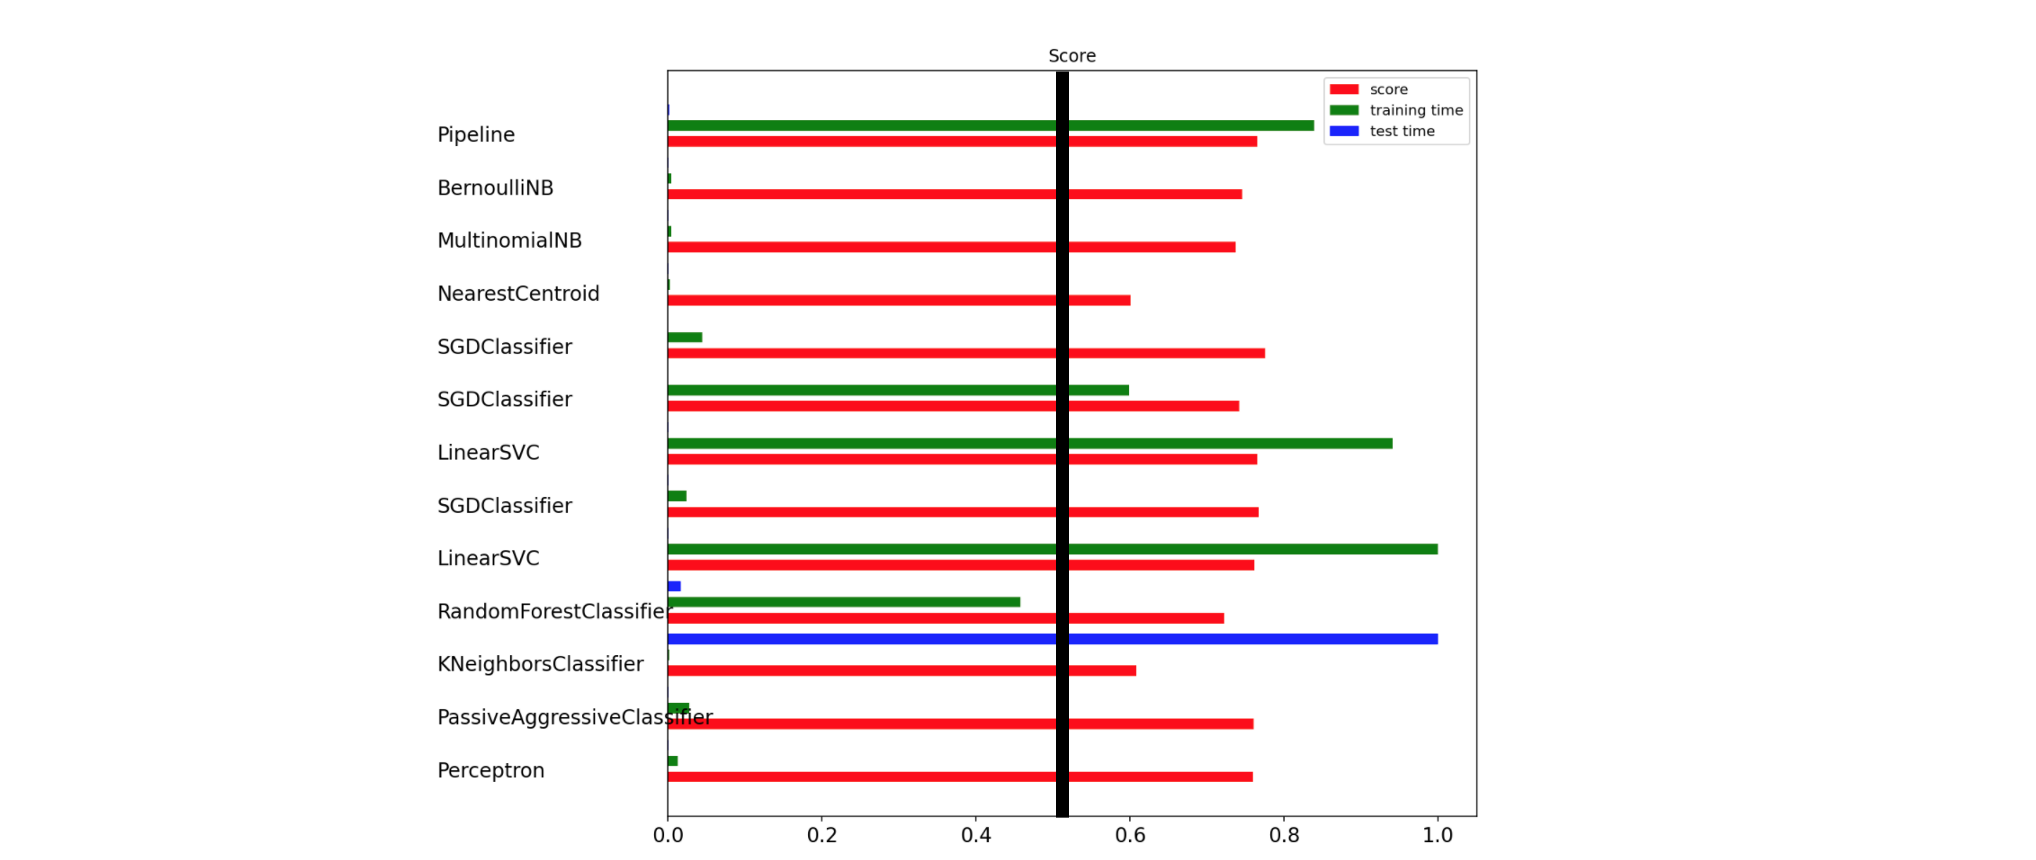

I also experimented with neural network models. I ran a Multilayer Perceptron Feed-Forward network using gridsearch to optimize the hidden layers and alpha. This resulted in an improved accuracy test score of 77% (cross validation score of 78%) and marginally improved precision and recall scores. However, the model was slow to run which limited my ability to optimise the parameters of the model. Given more time it would be interesting to run the model using distributed computing which would allow for better optimization and potentially significantly better scores.

Output from final neural network model:
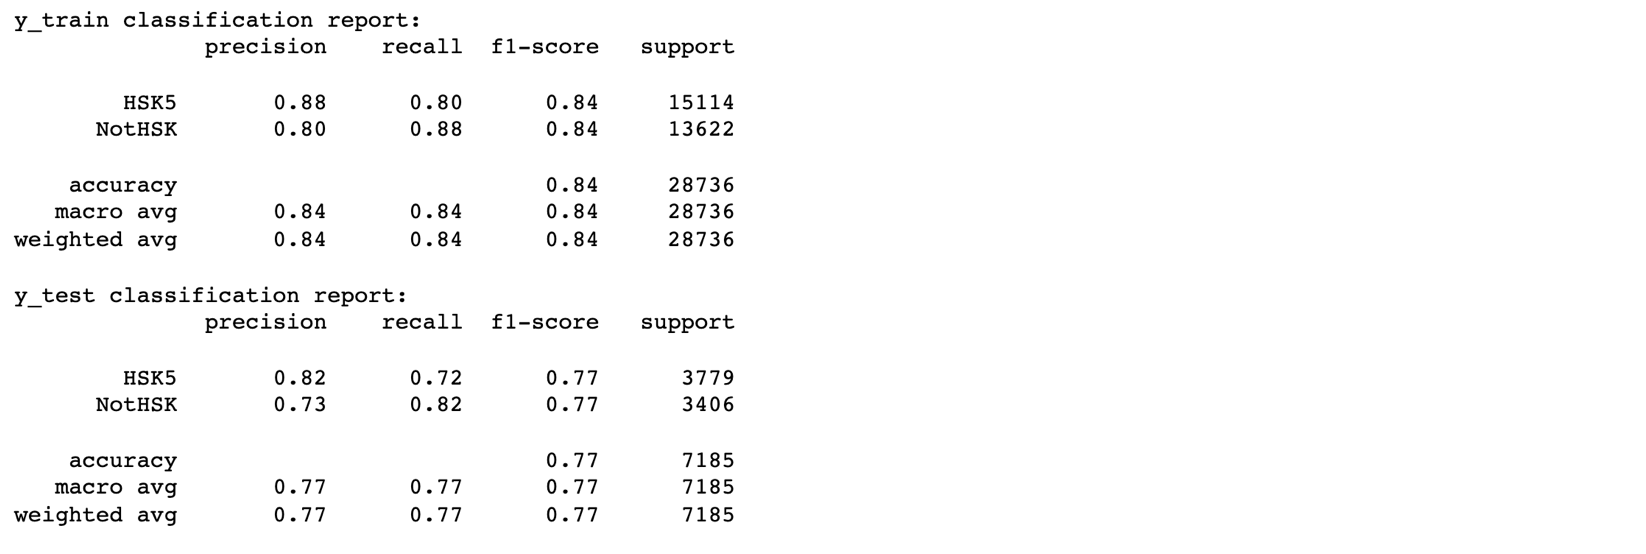
#### Multi Classification of Song Difficulty Based on Song Lyrics
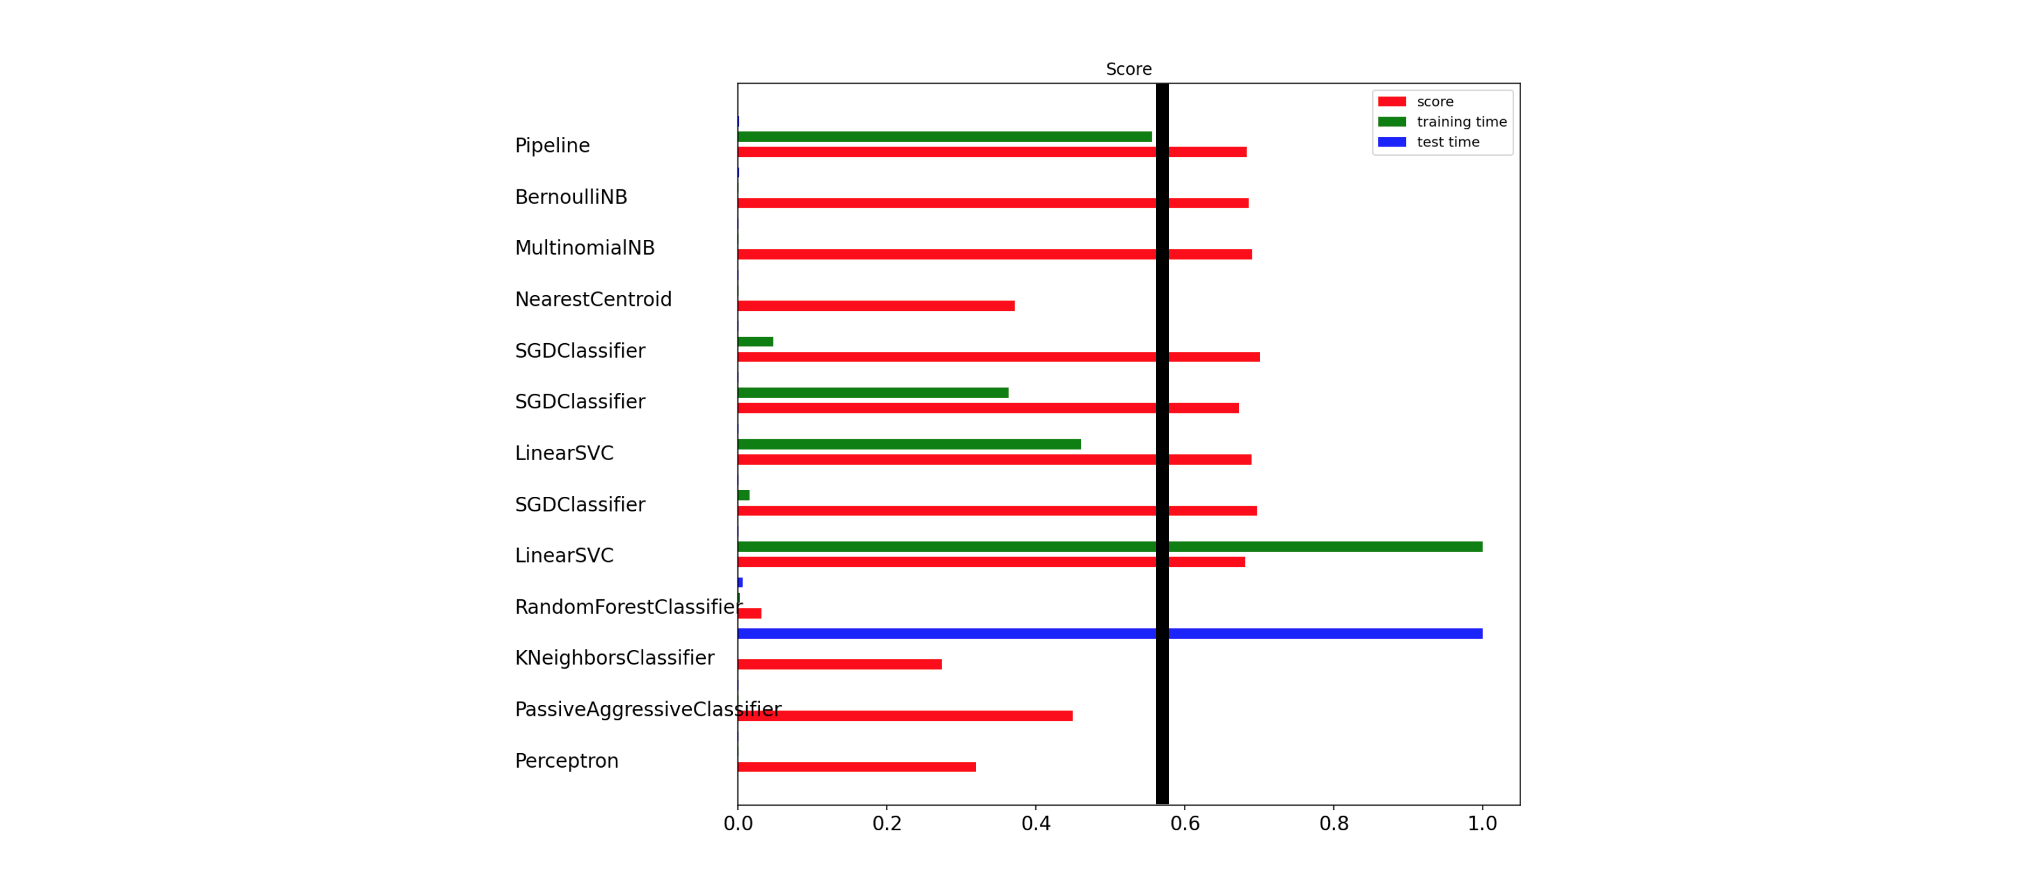
I ran multi classification models using lyrics as the explanatory variables and the target being song difficulty split into four groups HSK 1-3, HSK 4, HSK 5 and HSK 6. There was a large class imbalance with HSK 5 being the largest group accounting for c.58% of observations and HSK 1-3 the smallest accounting for only 3.2%. I found that applying inverse weights to the classes as a parameter in the models was effective at dealing with this. 

The BernoulliNB model was again the best performing model overall in terms of accuracy scores and run time. I ran a gridsearch on this model and obtained a test score of 69% and a mean cross validation score of 70%. 

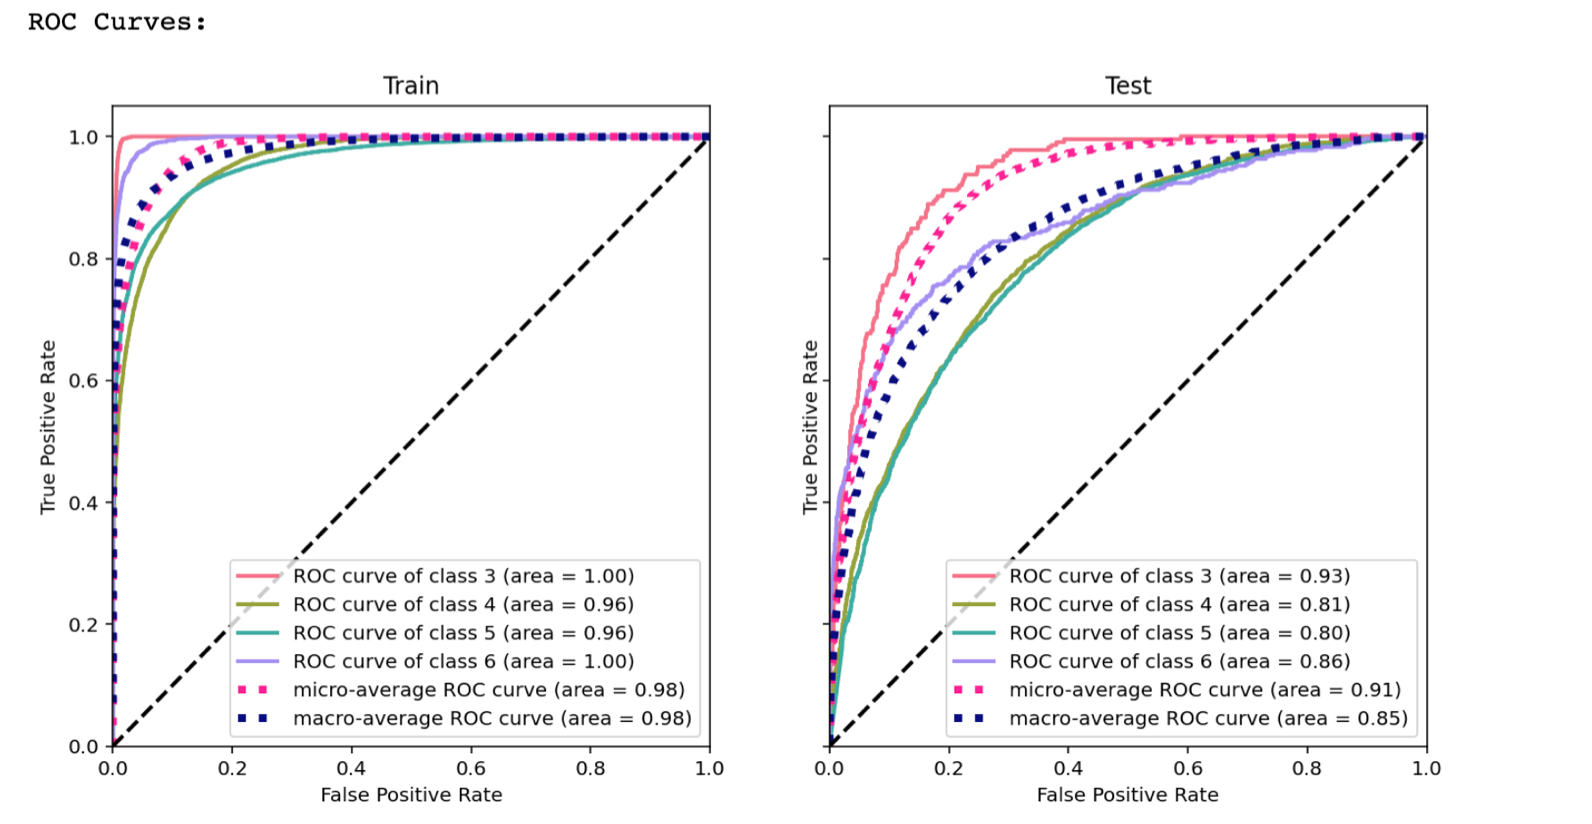

I also experimented with neural network models but again was limited by computation power. The test and training scores were 70% respectively in line with the BernoulliNB described above. 
#### Unsupervised Classification Models to Identify Topics and Group Songs with Similar Lyrics

I carried out preliminary investigations into whether songs could be split into meaningful categories / themes based on the lyrics in a song. My efforts were focussed on using k-means clustering which was computationally more efficient than some other models (such as Density-based spatial clustering "DBScan"). K-means aims to partition n observations into a specified number of clusters in which each observation belongs to the cluster with the nearest mean (cluster centers). I used the TfidfVectorizer as this adds greater weight to words that occur less frequently in the corpus and therefore may have more differentiating power. This is more suitable in this instance than using a count vectorizer. 

I experimented with different cluster sizes and below show the words from the first 3 groups in a model with a total of 60 clusters. Identifying topics is highly subjective and there are unsurprisingly common themes of love, family, friendship etc. that are so pervasive as to make splitting them up challenging. Nonetheless, looking at the first 3 groups there are some similarities. 

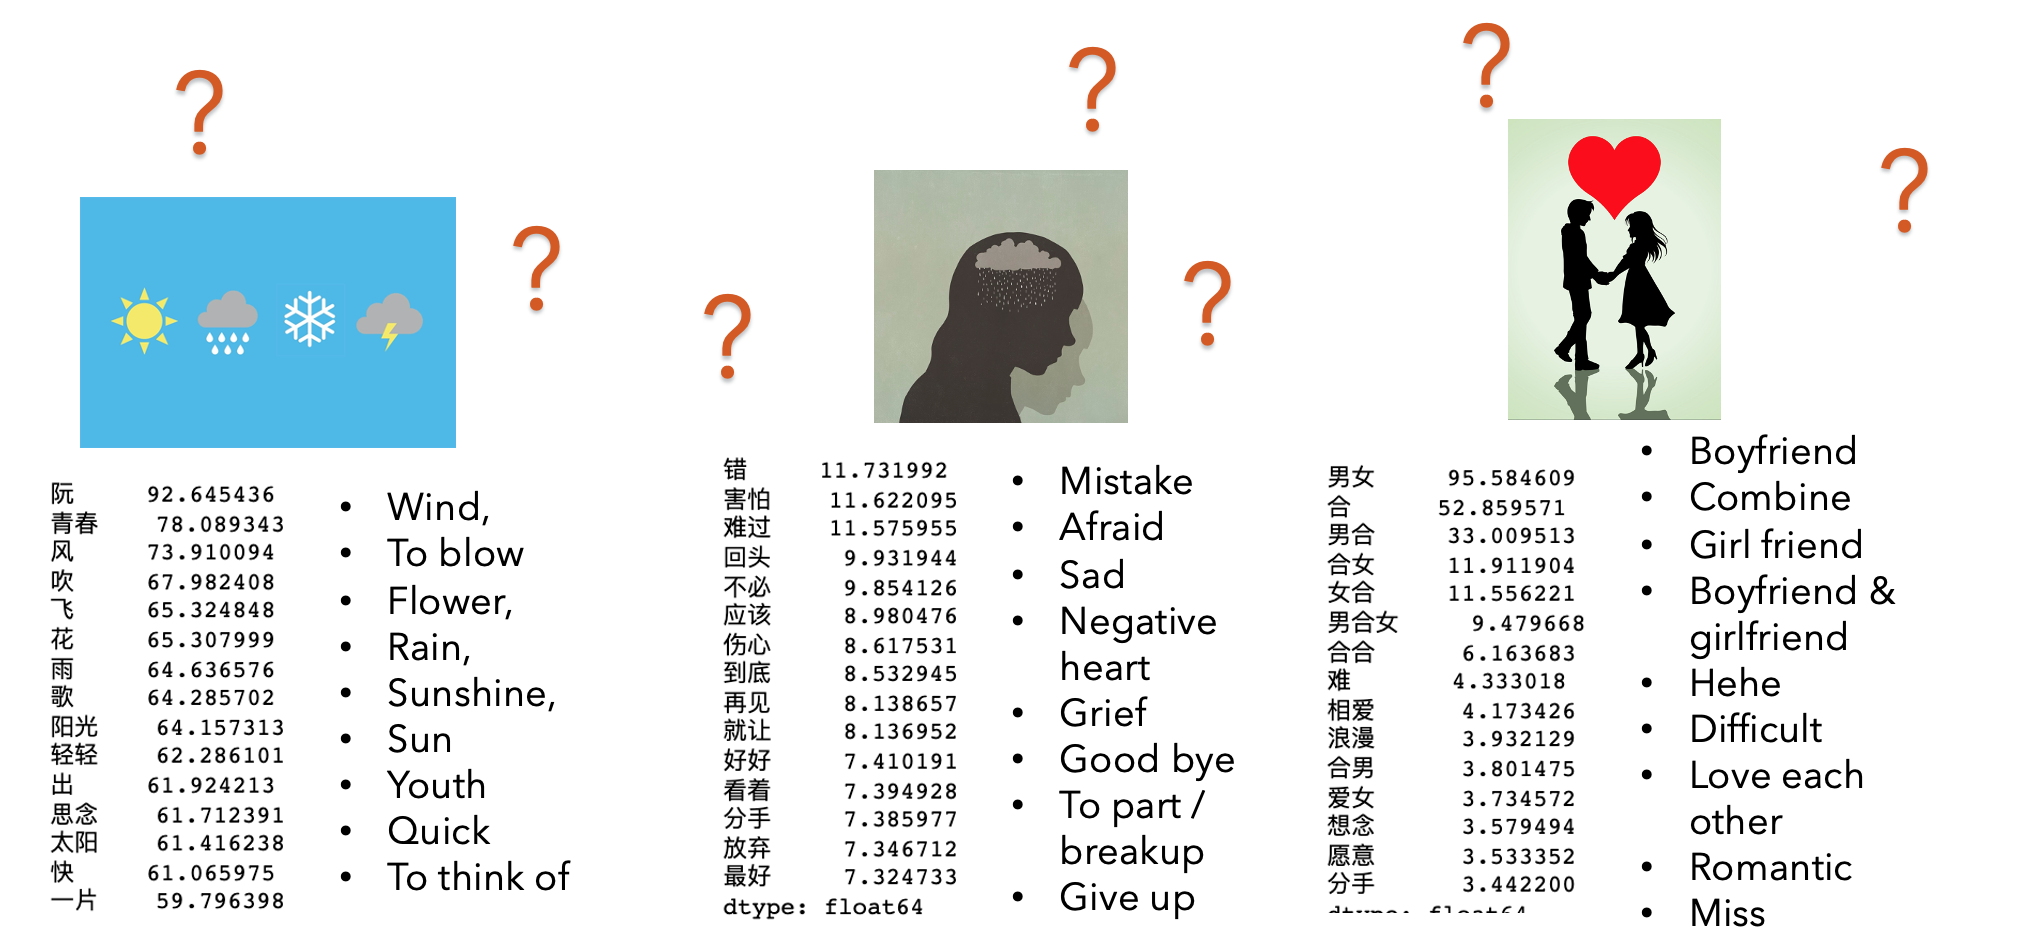

I did not have time to look into grouping songs with similar lyrics. However, I feel that this would be relatively simple to implement using a count vectorizer. The more time consuming aspect will be to write the Python code that will be able to evaluate how similar the words in each cluster are. 

### Limitations

The primary limitations encountered during this project were time available and computation power. It was necessary to balance using as many features in the NLP model with constraints on the time available to run the model. This also limited the potential to optimise model parameters. Another issue was the language barrier given the songs were in mandarin and my limited knowledge of the language. 

### Conclusions 

The problem we set out to answer was to identify whether machine learning can be used to make music a more accessible tool for people learning a foreign language. The data collection and analysis stage demonstrated that there are a small subset of songs that are more suitable to early stage language learners. These could be a valuable tool to people if they were made more accessible. The modelling stage also demonstrated that it is possible to train models to classify songs based on their difficulty. The application of unsupervised models to group songs was demonstrated to a lesser extent but the results would support further investigation. There was not time to apply unsupervised models to group songs based on similarity of lyrics although this is an area which I think would have the most potential benefit for further research. 

### Further Work
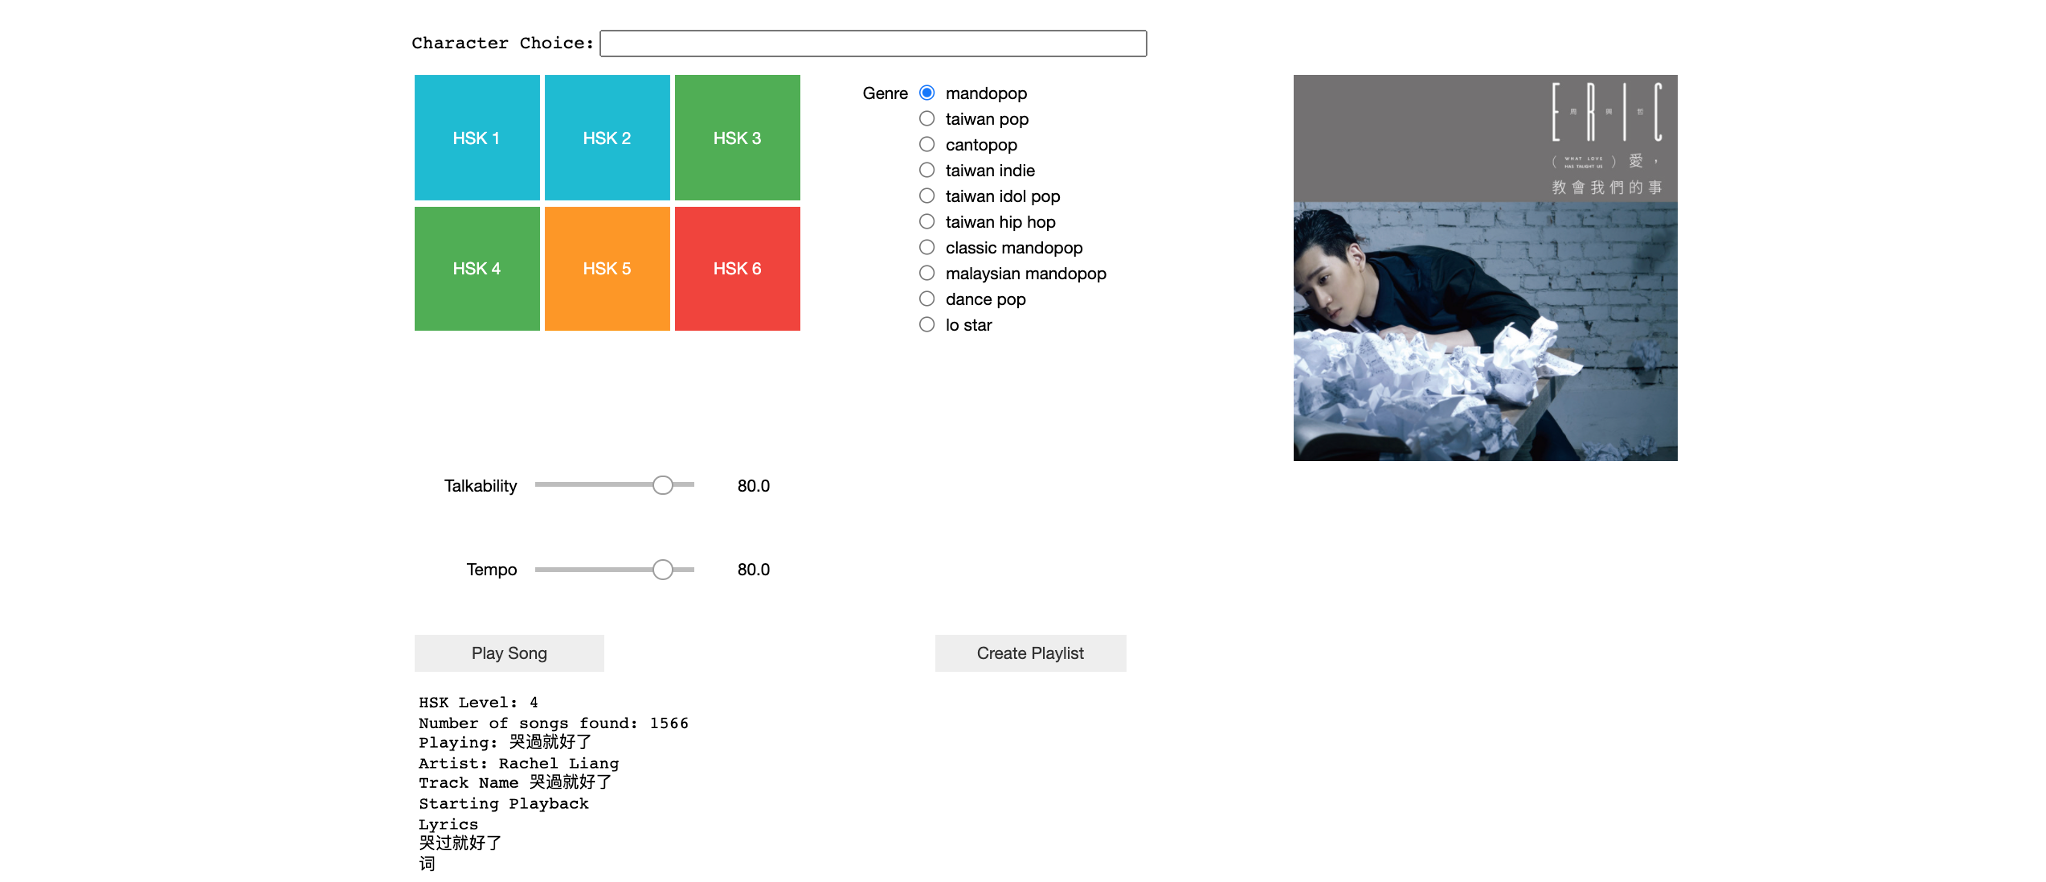

As a side project I put together a music player interface in Jupyter Notebook using a Python package "ipywidgets". The player currently allows a user to select a language difficulty level, a genre and to then play a random song from this criteria in Spotify. It also shows the lyrics to the song in a karaoke style at the bottom which are sourced from the SQLite database. A screenshot of the application is shown below. Currently some of the functionality has not been implemented:
- Character Choice - this would allow a user to select a character / words they would like to learn and find songs which contain this. 
- Talkability / Tempo - this would be relatively easy to implement and would allow a user to for example find songs with a greater amount of speech but that are slower and more therefore easier to understand.
- Create playlist - there is functionality through the Spotify API to create playlists on a users account. It would be interesting to be able to create custom playlists based on some of the parameters discussed in this document. 

In this project I focussed primarily on finding songs that would be at the right difficulty level for a listener, however it would be interesting to explore whether it is possible to find songs that also match a user's music tastes. This is challenging as there is on the face of it limited data that could be applied to this cause. The most obvious and readily available data point is genre, however there is limited overlap in how genres are described between English music and Chinese music (there may be more overlap in less disparate languages such as English and French). The genres are also generally broad with a majority of music just falling into a general category such as popular music or "indie". There is also limited scope to use lyrics as a differentiating factor. The answer may be to look at the actual audio data of songs (30 seconds audio clips are available from Spotify). Other research projects have shown that it is relatively straightforward to create spectrograms of audio files which can then be input into clustering algorithms. It would be interesting to experiment with this method as there is the potential to create a system where a user could select a song they enjoy in their own language and be returned a song(s) that are musically equivalent in a different language of their choice. 

### Key Learnings & Challenges

While the stated objective of this project was to investigate machine learning and foreign language learning, in reality it was an educational exercise to apply some of the lessons from the General Assembly Data Science Immersive Course. In this it was successful as it allowed me to utilise the following: Github, version control, data wrangling, APIs, binary and multi classification models, NLP, unsupervised learning and creating basic interfaces. 

### Libraries used

* Numpy
* Pandas
* SciPy
* Seaborn
* Matplotlib
* NLTK
* SciKit-Learn
* QQMusicAPI
* Spotipy
* SnowNLP
* ipywidgets

### Contact

If you found this project interesting or would like reach out, you can find me on <a href url="https://www.linkedin.com/in/stuartlee165/">LinkedIn</a>

